In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("/home/bedawati/Downloads/data.csv")

In [10]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [22]:
X = df[['Weight', 'Volume']]
y = df['CO2']

In [11]:
from sklearn import linear_model

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [13]:
import seaborn as sns

In [17]:
import numpy as np

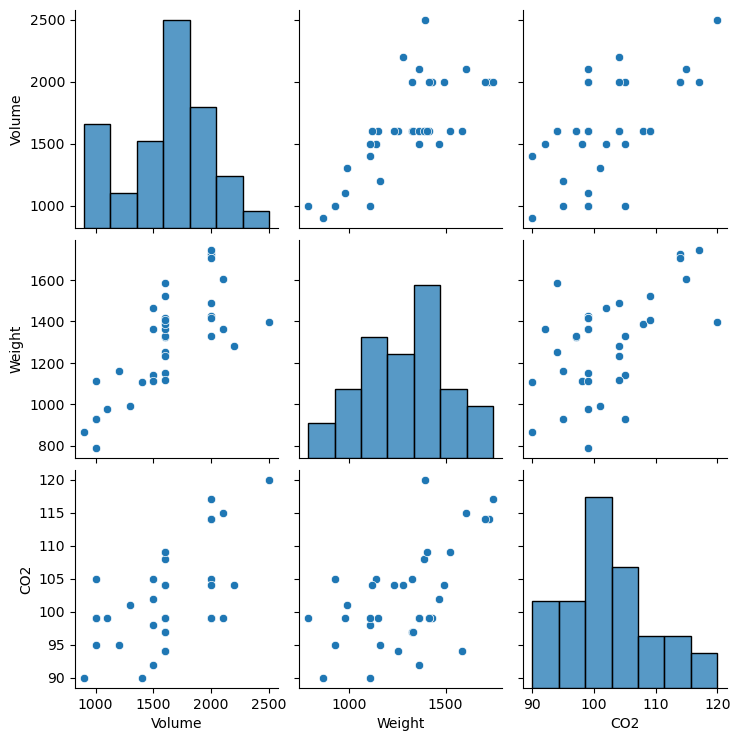

In [14]:
sns.pairplot(df)

/tmp/ipykernel_3880/2215294905.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(df.corr())
/tmp/ipykernel_3880/2215294905.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)


<Axes: >

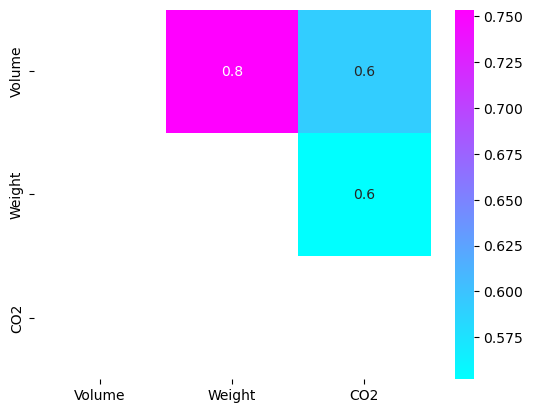

In [18]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.linear_model import LinearRegression

In [23]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(25, 2) (25,) (11, 2) (11,)


In [24]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr.intercept_

86.21073013150101

In [25]:
coeff_df = pd.DataFrame(mlr.coef_, X.columns, columns=['Coefficient'])

coeff_df

,Coefficient
Weight,0.000603
Volume,0.008962


In [28]:
example = [40, 10]
output = mlr.intercept_ + sum(example*mlr.coef_)
output

86.32448725935993

In [29]:
Y_pred = mlr.predict(X_test)

In [33]:
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R Squared Score is:', r2_score(y_test, Y_pred))

Mean Absolute Error: 5.924827779223077
Mean Squared Error: 46.983972352483555
Root Mean Squared Error: 6.854485564393841
R Squared Score is: 0.35718445786403097


In [37]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

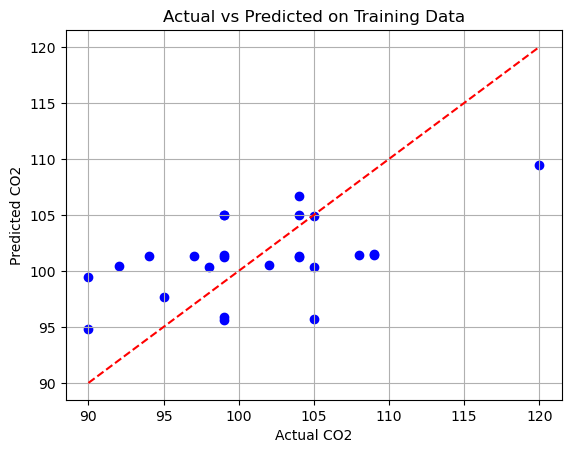

In [42]:


# X_train and y_train = training data
# mlr = trained model

y_pred = mlr.predict(X_train)

plt.scatter(y_train, y_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # reference line
plt.xlabel("Actual CO2")
plt.ylabel("Predicted CO2")
plt.title("Actual vs Predicted on Training Data")
plt.grid(True)
plt.show()

In [51]:
y_train, y_pred

(35    120
 33    108
 28    109
 32    104
 8      98
 13     94
 5     105
 17    104
 14     97
 7      92
 26    104
 1      95
 12     99
 25    102
 24     99
 6      90
 23     99
 4     105
 18    104
 21     99
 19    105
 9      99
 34    109
 3      90
 0      99
 Name: CO2, dtype: int64,
 array([109.45824265, 101.38912045, 101.46936512, 101.29560223,
        100.32515706, 101.30585907,  95.73357552, 106.70015634,
        101.35050648, 100.47780293, 105.03439056,  97.66541571,
         95.84398735, 100.53813726, 104.98913981,  99.42711309,
        101.40420404, 100.34205068, 101.22561441, 104.99698327,
        104.93664893, 101.24431805, 101.3981706 ,  94.7987276 ,
         95.64971079]))

In [53]:
y2_pred = mlr.predict(X_test)

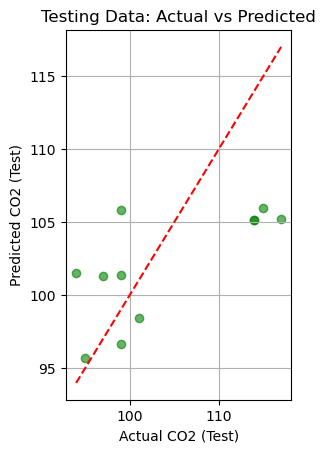

In [54]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y2_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO2 (Test)")
plt.ylabel("Predicted CO2 (Test)")
plt.title("Testing Data: Actual vs Predicted")
plt.grid(True)

In [55]:
y_test, y2_pred

(31    117
 20     94
 16     99
 30    115
 22     99
 15     97
 10     99
 2      95
 11    101
 29    114
 27    114
 Name: CO2, dtype: int64,
 array([105.18884645, 101.50616906, 101.37403687, 106.00000898,
        105.85520658, 101.35291985,  96.66057997,  95.73357552,
         98.45908129, 105.16410937, 105.17617624]))